In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
from utiles import *
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.metrics import cohen_kappa_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
from imblearn.under_sampling import AllKNN, RepeatedEditedNearestNeighbours
%matplotlib inline

In [2]:
loader = DataHandler("data")
loader.load_all()
data = loader.get_all()

In [3]:
clase = "sudan 4 - 2,5%"
target = np.where(data["clase"] == clase, 0, 1)
np.bincount(target)

array([ 40, 526])

In [4]:
std = StandardScaler()
scaled_ = std.fit_transform(data.iloc[:,:-1])

X_train, X_test, y_train, y_test = train_test_split(scaled_, target)

# X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], target)
# ad = RepeatedEditedNearestNeighbours(ratio="majority", random_state=15, n_jobs=4, n_neighbors=4)

# new_X_train, new_y_train = ad.fit_sample(X_train, y_train)
# np.bincount(y_train), np.bincount(new_y_train)

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")                # create the RFE model and select 20 from 1557 attributes
rfe = RFE(model, 30, step=20)
rfe = rfe.fit(X_train, y_train)

indices = np.where(rfe.support_)            # Mask of selected features

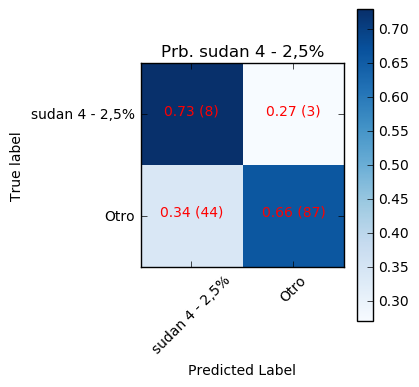

0.14457831325301218

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, n_estimators=20, n_jobs=4,
                             random_state=15, criterion="entropy", class_weight="balanced")
clf.fit(X_train[:, indices[0]], y_train)

predicted = clf.predict(X_test[:, indices[0]])

cm = confusion_matrix(y_pred=predicted, y_true=y_test)
plot_confusion_matrix(cm, classes=[clase, "Otro"], title="Prb. {}".format(clase))
cks_ = cohen_kappa_score(y_test, predicted)
cks_